In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
df.shape

(500, 9)

In [17]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Probability
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [18]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Probability          0
dtype: int64

In [19]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Probability
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


# Data visualization

array([[<AxesSubplot: title={'center': 'Serial No.'}>,
        <AxesSubplot: title={'center': 'GRE Score'}>,
        <AxesSubplot: title={'center': 'TOEFL Score'}>],
       [<AxesSubplot: title={'center': 'University Rating'}>,
        <AxesSubplot: title={'center': 'SOP'}>,
        <AxesSubplot: title={'center': 'LOR '}>],
       [<AxesSubplot: title={'center': 'CGPA'}>,
        <AxesSubplot: title={'center': 'Research'}>,
        <AxesSubplot: title={'center': 'Probability'}>]], dtype=object)

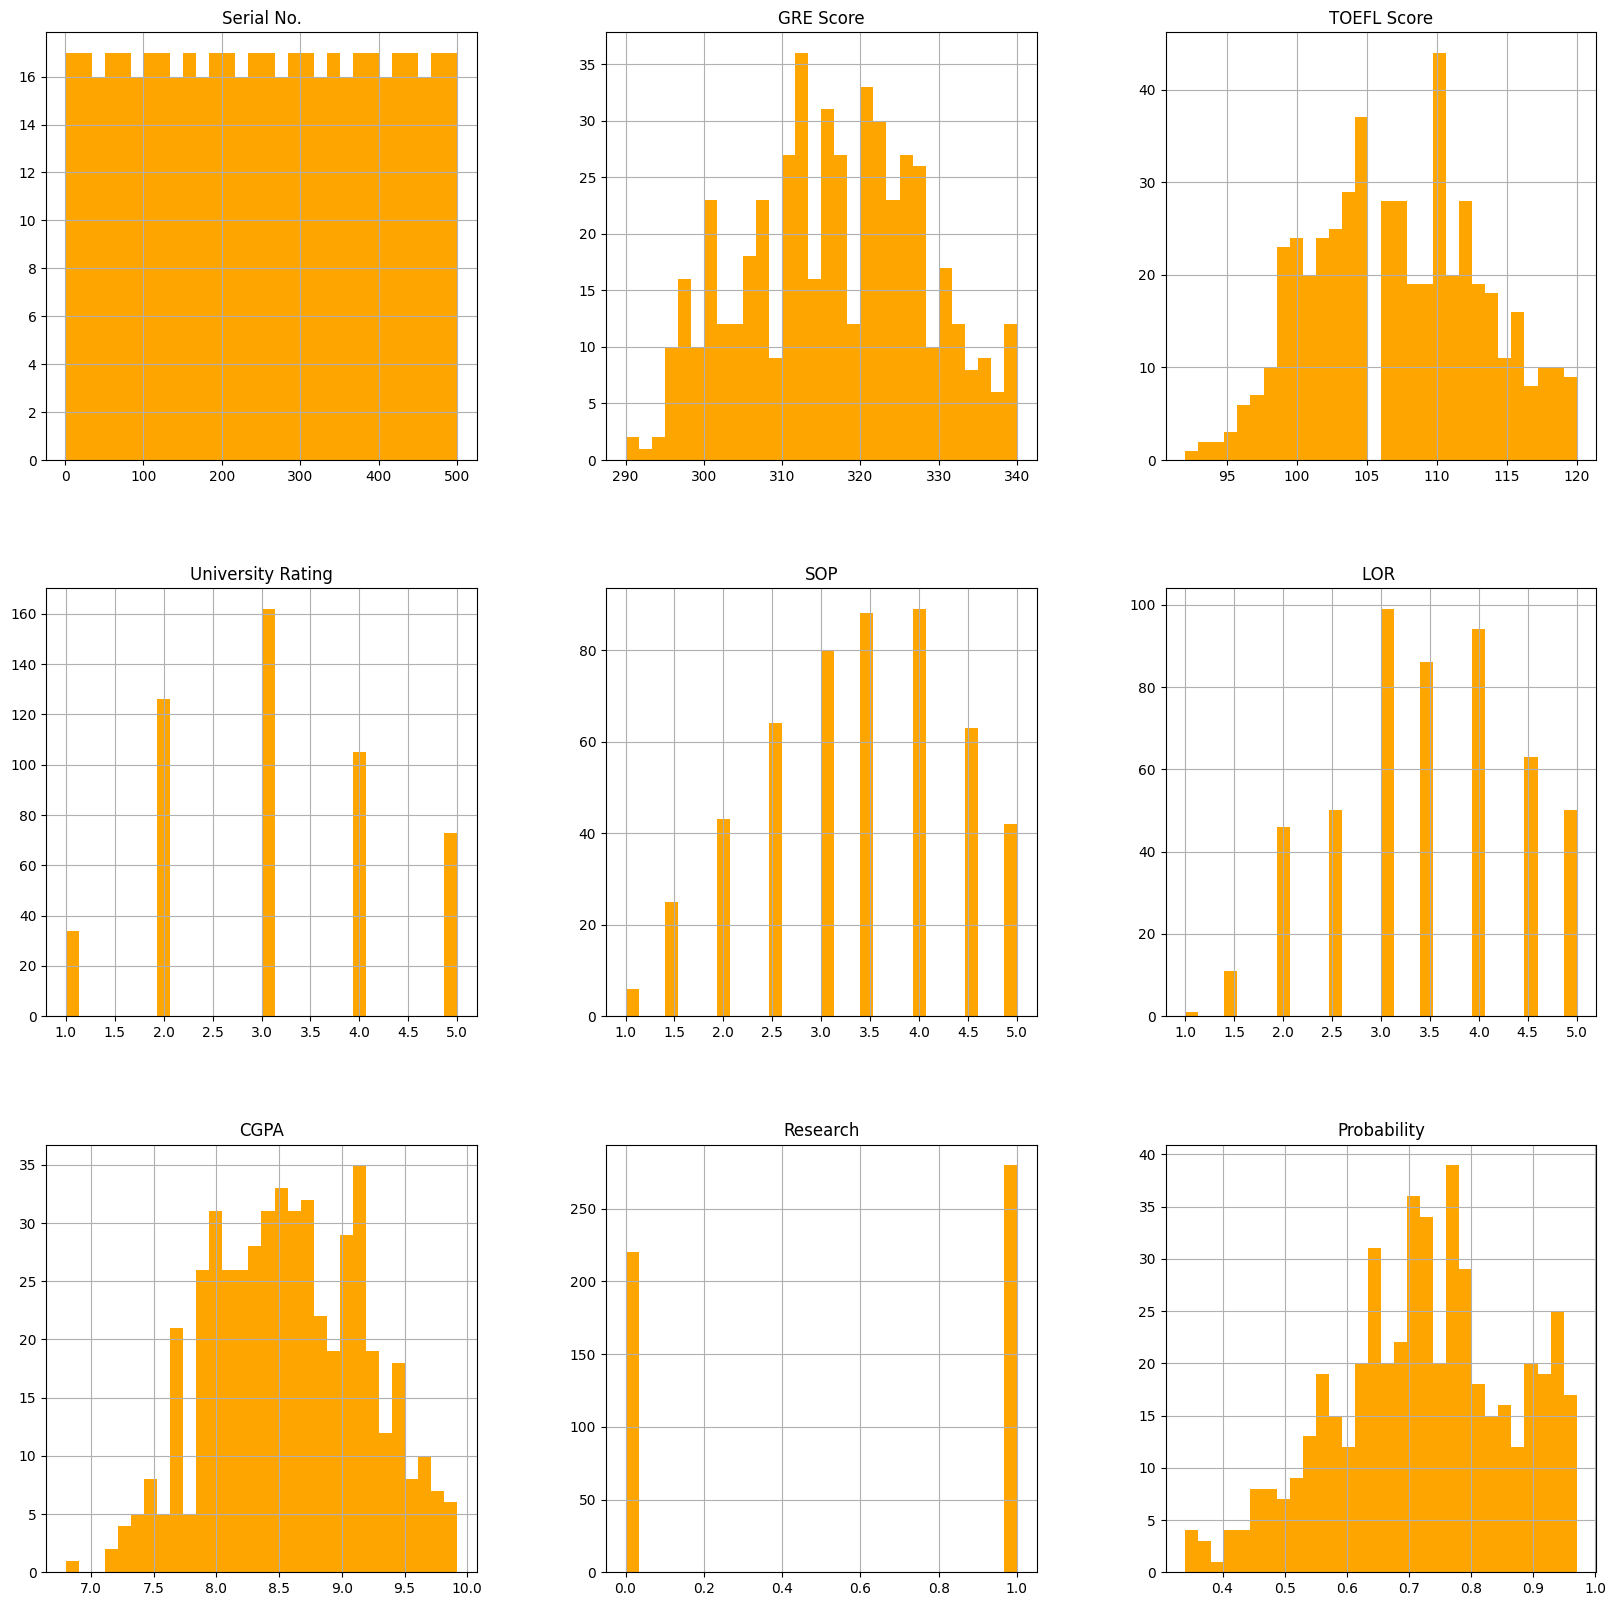

In [20]:
#histogram plot
df.hist(bins = 30, figsize = (20,20), color = 'orange')

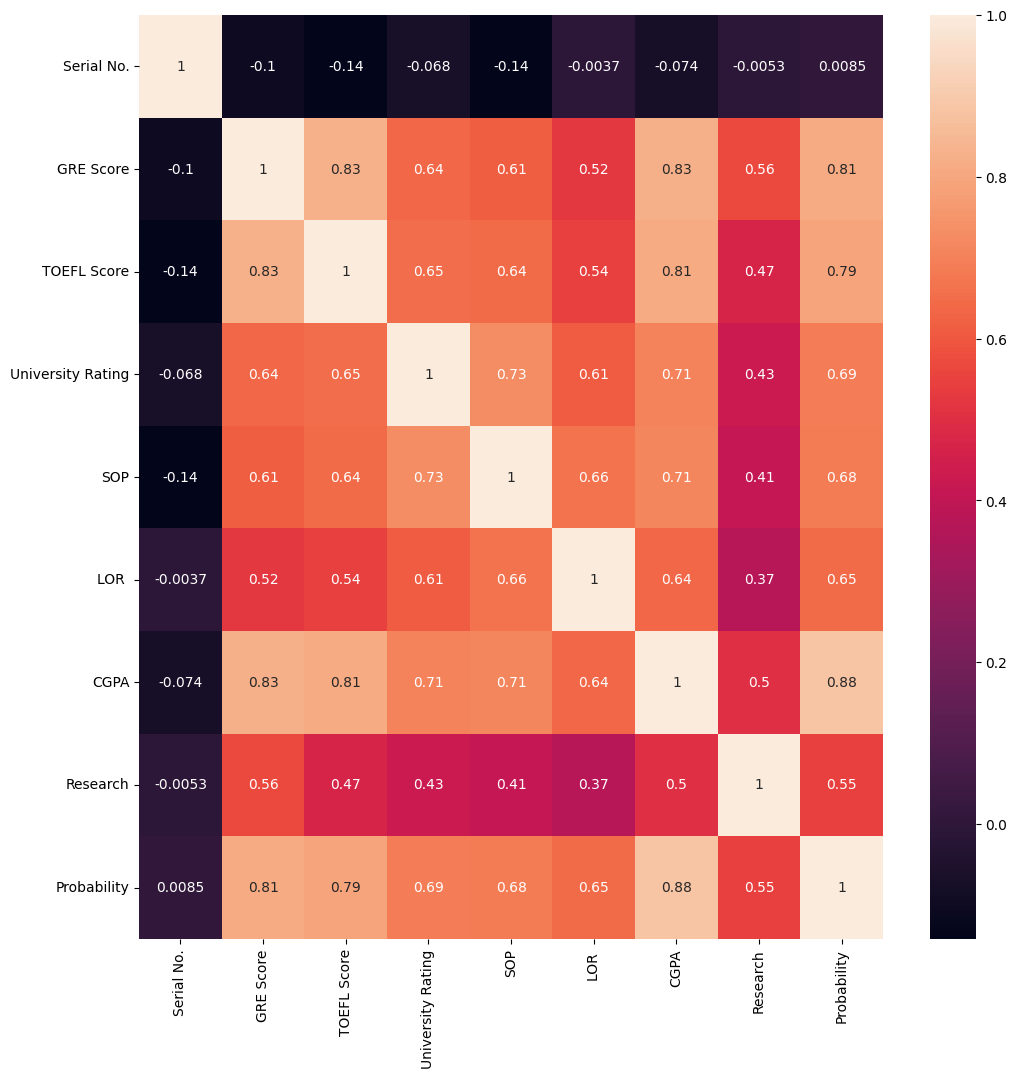

In [22]:
# correlation matrix, heatmap
corr_matrix = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)   # annot: so that numbers are shown in the heatmap
plt.show()

In [ ]:
#Linear regression model implementation

In [14]:
data = np.array(column)

In [15]:
X = data[0:, 1:-1]
y = data[0:, -1]

In [16]:
# splitting the data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
s = np.array([327,113,4,4.5,4.5,9.04,0])
s = s.reshape(1,-1)

In [19]:
print(model.predict(s))

[0.81562033]


In [20]:
y_preds = model.predict(X_test)

print(f"mse : {mean_squared_error(y_test, y_preds)}")
print(f"rmse : {np.sqrt(mean_squared_error(y_test, y_preds))}")

mse : 0.004104060623134785
rmse : 0.06406294266683965


In [21]:
#accuracy score 
accuracy_LinearRegression = model.score(X_test, y_test)
accuracy_LinearRegression

0.8212010449331117

In [ ]:
pickle.dump(model,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))